In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\Saunak\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df=df.drop(["EmployeeCount","StandardHours"],axis=1)
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeNumber  \
0                    1          2  Life Sciences               1   
1                    8          1  Life Sciences               2   
2                    2          2          Other               4   
3                    3          4  Life Sciences               5   
4                    2          1        Medical               7   
...                ...        ...            ...             ...   
1465                23          2        Medical            2061   
1466                 6          1        Medical            2062   
1467                 4          3  Life Sciences            2064   
1468                 2          3        Medical            2065   
1469                 8          3        Medical            2068   

      EnvironmentSatisfaction  ... PerformanceRating  \
0                           2  ...                 3   
1                           3  ...                 4   
2                           4  ...                 3   
3                           4  ...                 3   
4                           1  ...                 3   
...                       ...  ...               ...   
1465                        3  ...                 3   
1466                        4  ...                 3   
1467                        2  ...                 4   
1468                        4  ...                 3   
1469                        2  ...                 3   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                            1                 0                  8   
1                            4                 1                 10   
2                            2                 0                  7   
3                            3                 0                  8   
4                            4                 1                  6   
...                        ...               ...                ...   
1465                         3                 1                 17   
1466                         1                 1                  9   
1467                         2                 1                  6   
1468                         4                 0                 17   
1469                         1                 0                  6   

     TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  \
0                        0                1              6   
1                        3                3             10   
2                        3                3              0   
3                        3                3              8   
4                        3                3              2   
...                    ...              ...            ...   
1465                     3                3              5   
1466                     5                3              7   
1467                     0                3              6   
1468                     3                2              9   
1469                     3                4             

In [5]:
df.shape

(1470, 33)

# Checking null values

In [6]:


df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

<AxesSubplot:>

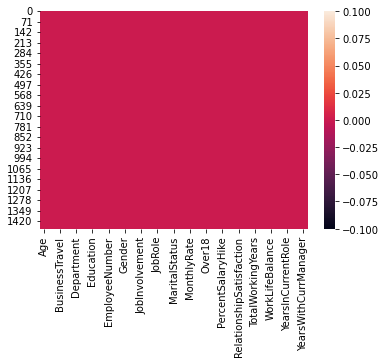

In [7]:
import seaborn as sns
sns.heatmap(df.isnull())

so there is no null values are present

# EDA

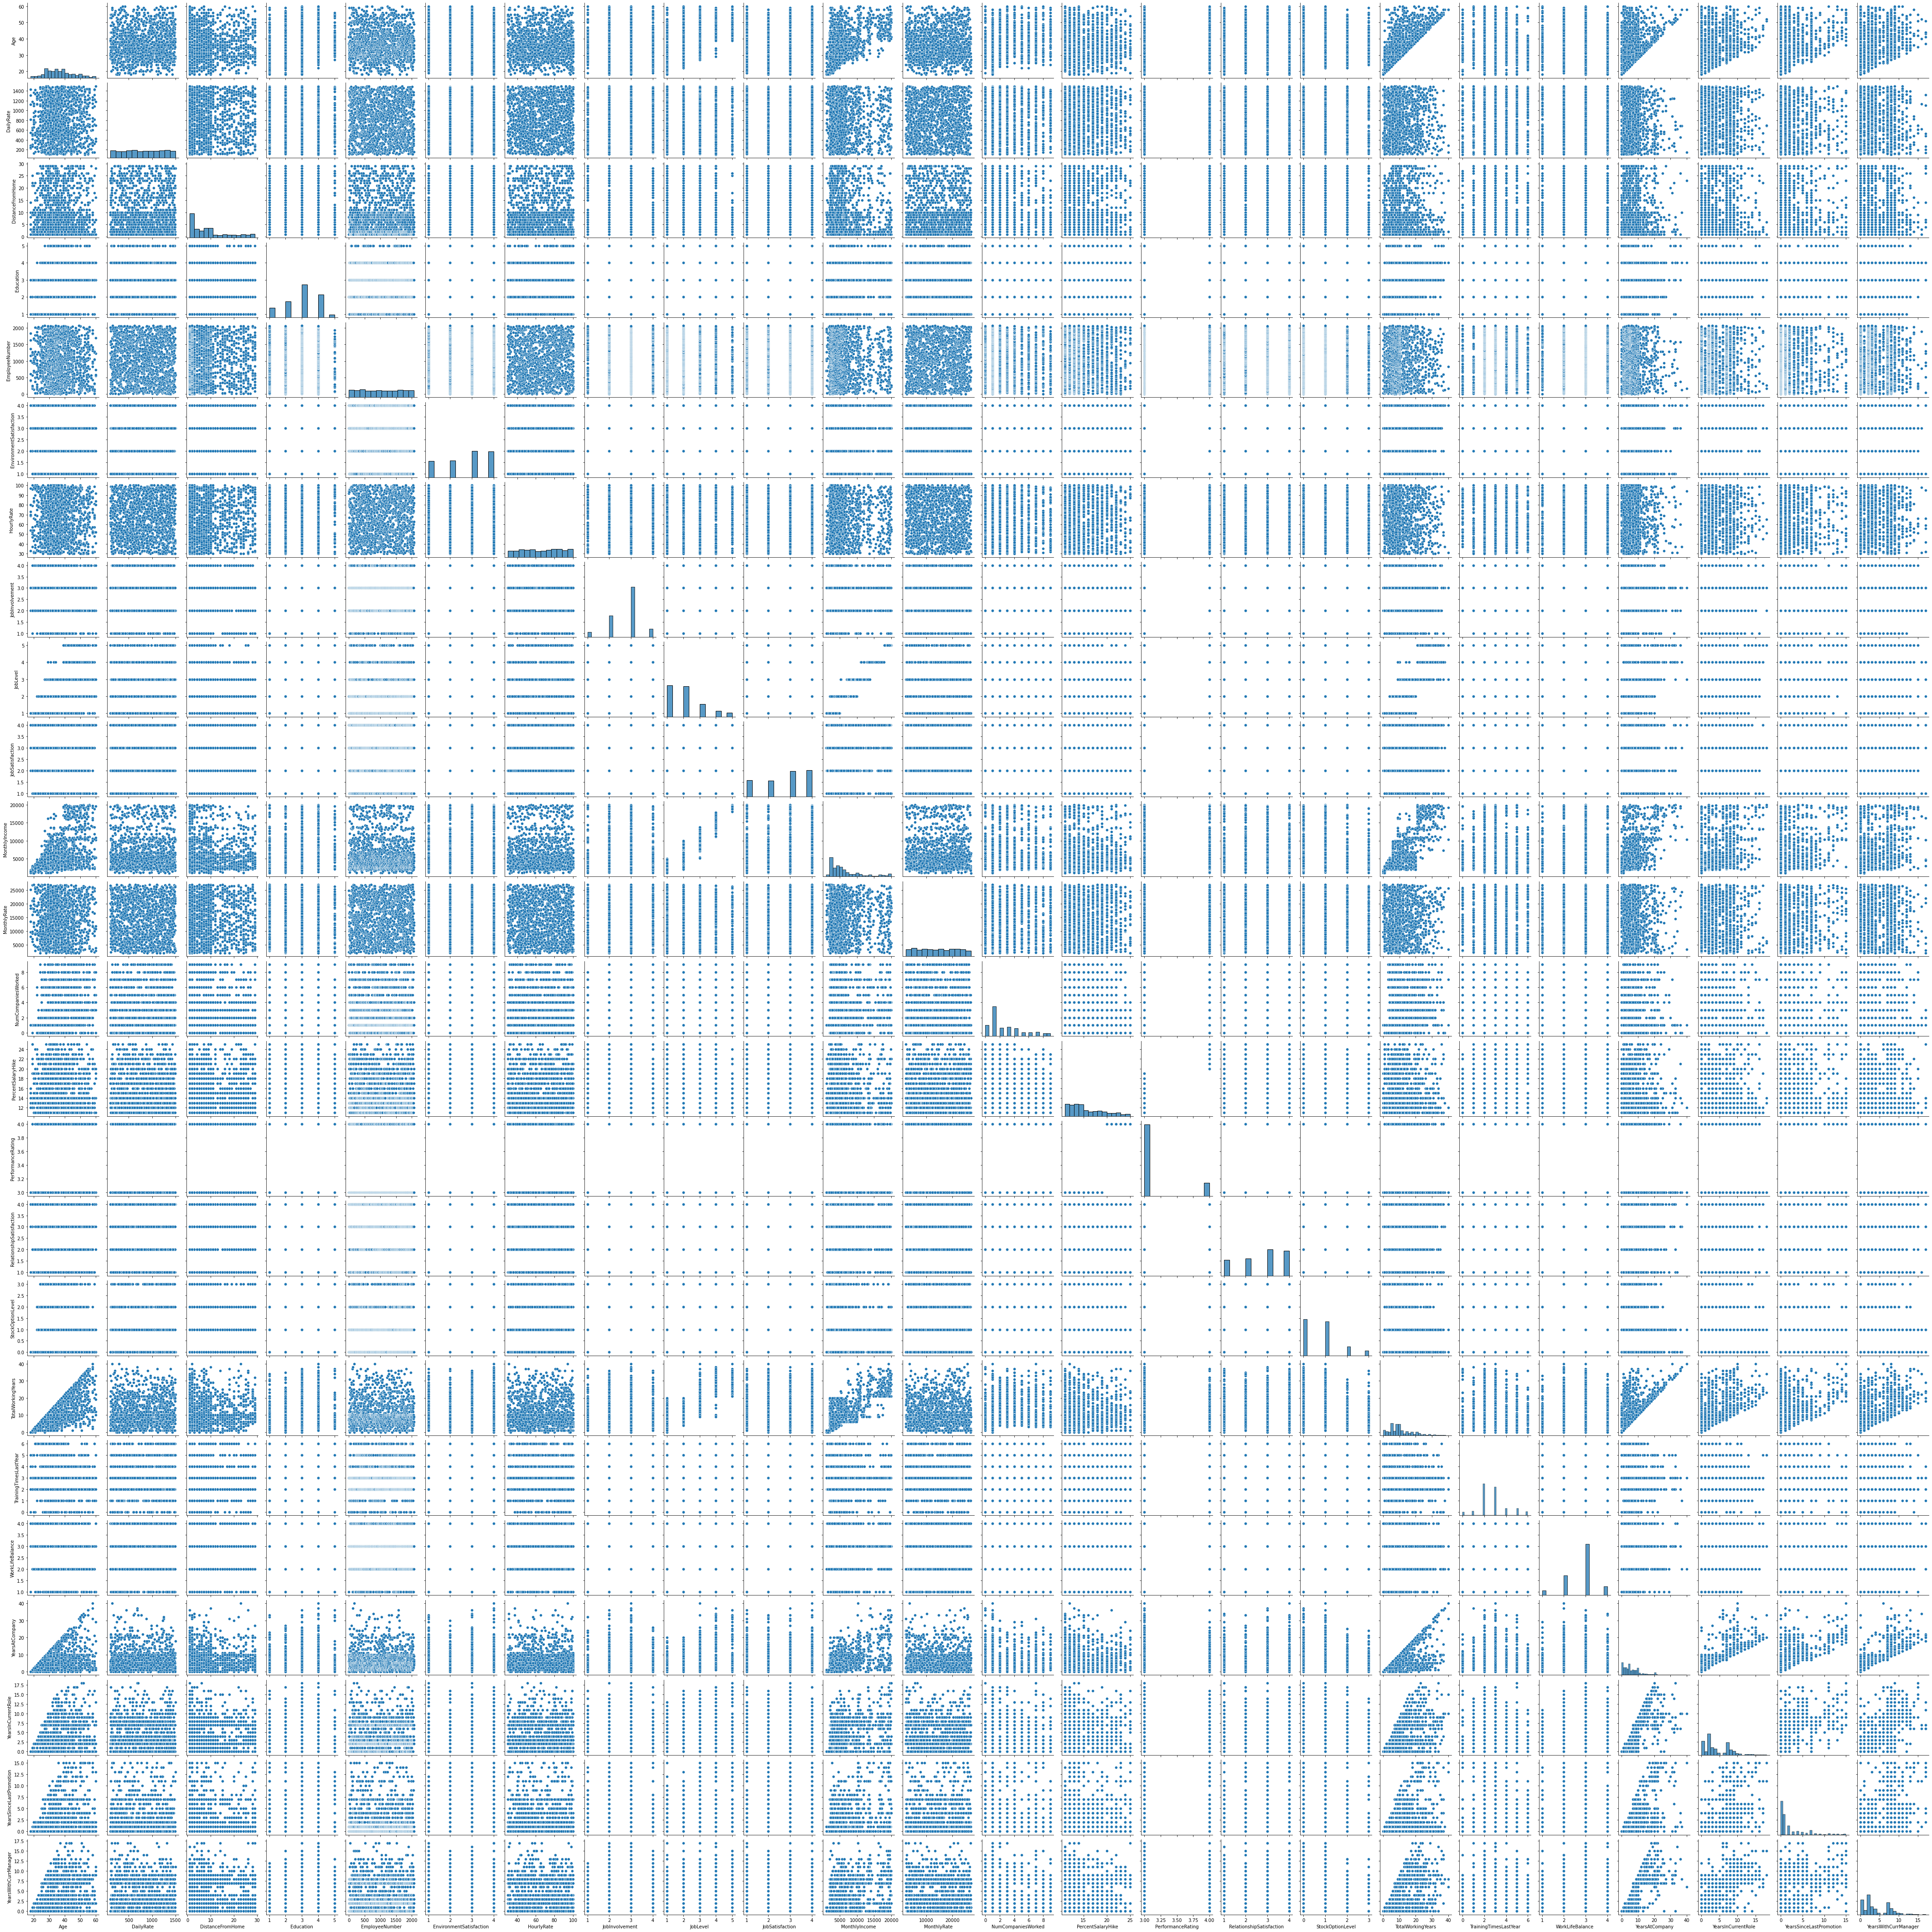

In [8]:
sns.pairplot(df)

<AxesSubplot:ylabel='Frequency'>

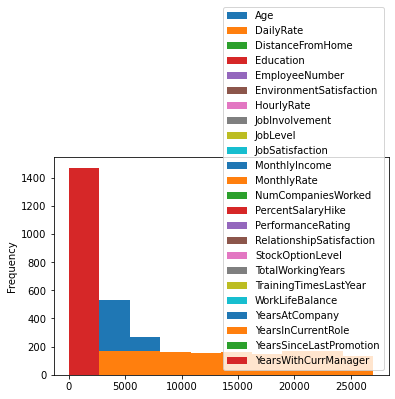

In [8]:
df.plot(kind="hist")

# CORRELATION

In [9]:
df.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EmployeeNumber  EnvironmentSatisfaction  HourlyRate  \
Age                            -0.010145                 0.010146    0.024287   
DailyRate                      -0.050990                 0.018355    0.023381   
DistanceFromHome                0.032916                -0.016075    0.031131   
Education                       0.042070                -0.027128    0.016775   
EmployeeNumber                  1.000000                 0.017621    0.035179   
EnvironmentSatisfaction         0.017621                 1.000000   -0.049857   
HourlyRate                      0.035179                -0.049857    1.000000   
JobInvolvement                 -0.006888                -0.008278    0.042861   
JobLevel                       -0.018519                 0.001212   -0.027853   
JobSatisfaction                -0.046247                -0.006784   -0.071335   
MonthlyIncome                  -0.014829                -0.006259   -0.015794   
MonthlyRate                     0.012648                 0.037600   -0.015297   
NumCompaniesWorked             -0.001251                 0.012594    0.022157   
PercentSalaryHike              -0.012944                -0.031701   -0.009062   
PerformanceRating              -0.020359                -0.029548   -0.002172   
RelationshipSatisfaction       -0.069861                 0.007665    0.001330   
StockOptionLevel                0.062227                 0.003432    0.050263   
TotalWorkingYears              -0.014365                -0.002693   -0.002334   
TrainingTimesLastYear           0.023603                -0.019359   -0.008548   
WorkLifeBalance                 0.010309                 0.027627   -0.004607   
YearsAtCompany                 -0.011240                 0.001458   -0.019582   
YearsInCurrentRole             -0.008416                 0.018007   -0.024106   
YearsSinceLastPromotion        -0.009019                 0.016194   -0.026716   
YearsWithCurrManager           -0.009197                -0.004999   -0.020123   

                          JobInvolvement  JobLevel  Jo

<AxesSubplot:>

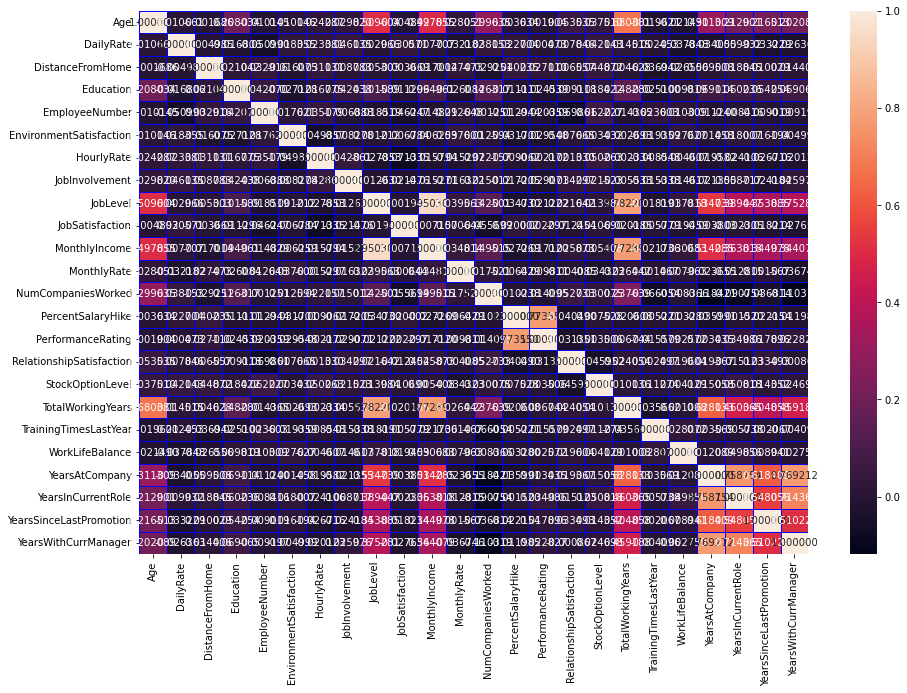

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="blue",fmt='2f')

WorkLifeBalance,TrainingTimesLastYear,DistanceFromHome,EmployeeNumber, This values are nagetivly correlated

MonthlyIncome,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobLevel,Education,NumCompaniesWorked.TotalWorkingYeare	 this are very strongly correlated

PerformanceRating,PercentSalaryHike,DailyRate,MonthlyRate,HourlyRate,JobInvolvement,DailyRate this are very weakly correlated

# Describing dataset

In [11]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  ...  PerformanceRating  \
count  1470.000000      1470.000000  ...        1470.000000   
mean      2.063946         2.728571  ...           3.153741   
std       1.106940         1.102846  ...           0.360824   
min       1.000000         1.000000  ...           3.000000   
25%       1.000000         2.000000  ...           3.000000   
50%       2.000000         3.000000  ...           3.000000   
75%       3.000000         4.000000  ...           3.000000   
max       5.000000         4.000000  ...           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               1470.000000       1470.000000        1470.000000   
mean                   2.712245          0.793878          11.279592   
std                    1.081209          0.852077           7.780782   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           6.000000   
50%                    3.000000          1.000000          10.000000   
75%                    4.000000          1.000000          15.000000   
max                    4.000000          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1470.000000      1470.000000     1470.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289271         0.706476        6.126525   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             4.229252                 2.187755              4.123129  
std              3.623137                 3.222430              3.568136  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 24 columns]

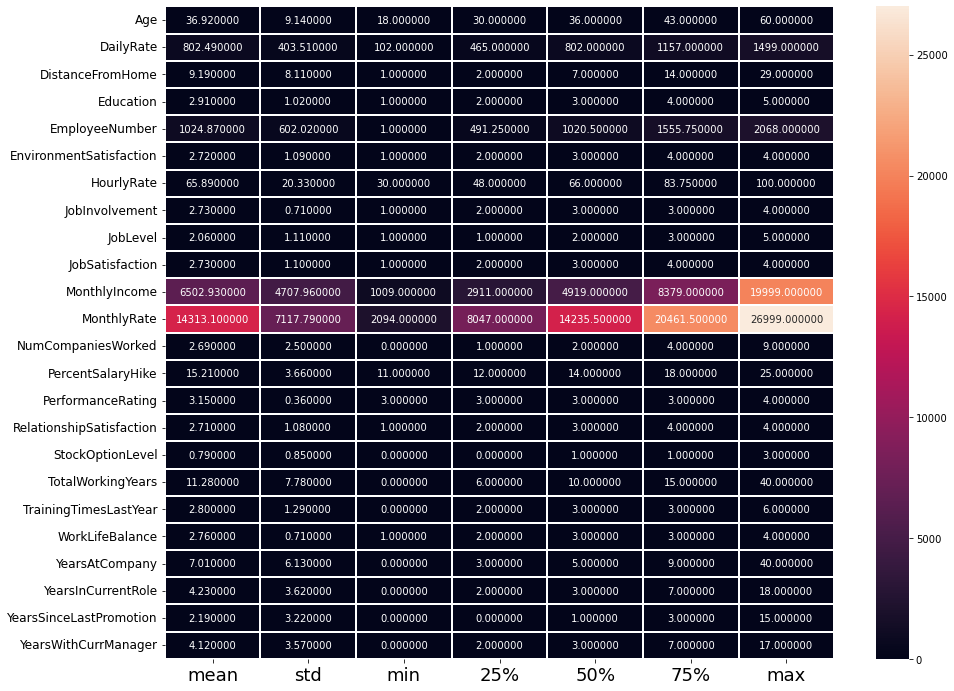

In [12]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12) 
plt.show()

Age

mean:36

median:36

min:18

Max: 60

DailyRate

mean:802

median:802

min:102

Max: 1499

DistanceFromHome

mean:9

median:7

min:1

Max: 29

Education

mean:2.04

median:3

min:1

Max: 5

EmployeeNumber

mean:1024

median:1022

min:1

Max: 2068

EmployeeSatisfaction

mean:2

median:3

min:1

Max: 4

HourlyRate

mean:65

median:66

min:30

Max: 100

JobInvolvement	

mean:2

median:3

min:1

Max: 4

JobSatisfaaction

mean:2

median:1

min:3

Max: 4

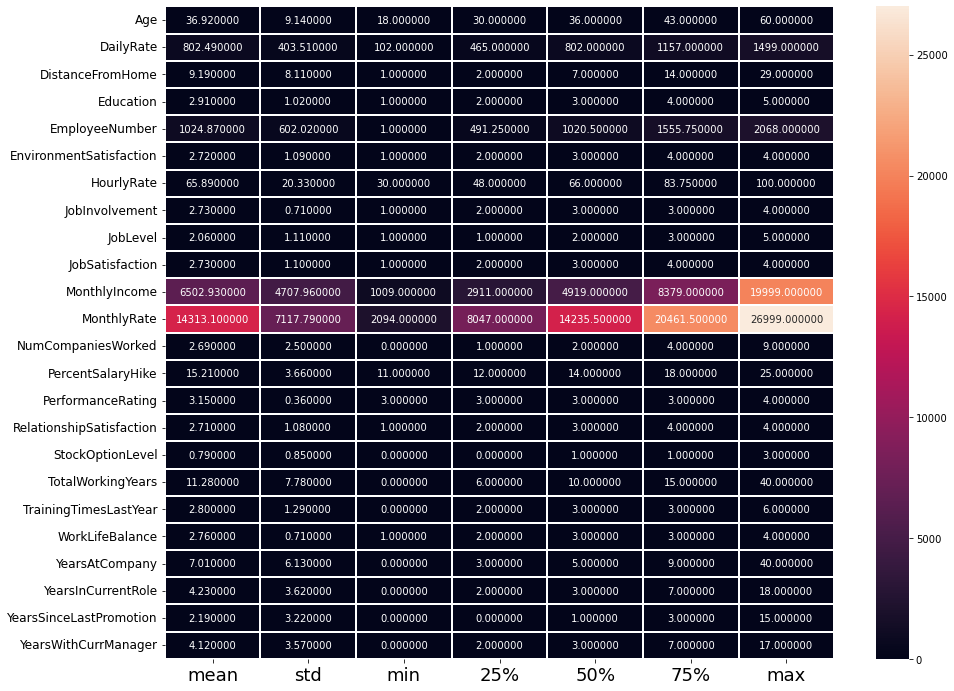

In [13]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12) 
plt.show()

# Distribution curve

In [14]:
from sklearn.preprocessing import LabelEncoder
for column in df:
    if df[column].dtypes == 'object':
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])

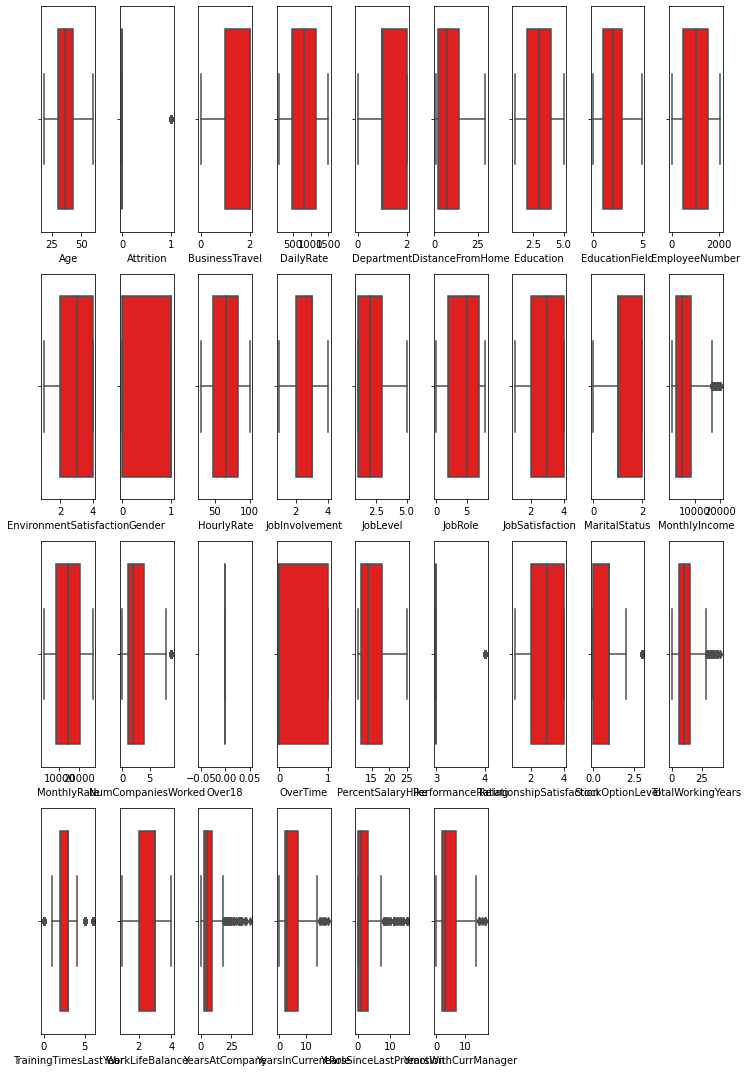

In [15]:
colist=df.columns.values
graph=1
plt.figure(figsize=(10,15))
for i in range(0, len(colist)):
    plt.subplot(4,9,graph)
    sns.boxplot(df[colist[i]],color='red',orient='h')
    graph+=1
    plt.tight_layout()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeNumber            1470 non-null   int64
 9   EnvironmentSatisfaction   1470 non-null   int64
 10  Gender                    1470 non-null   int32
 11  HourlyRate                1470 non-null   int64
 12  JobInvolvement            1470 non-null   int64
 13  JobLevel                  1470 non-null   int64
 14  JobRole                   1470 non-null 

# Outlayer checking there is no outlayer is present

# Skewness

In [17]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
T

# Splitting the independent and target variables in x and y before removing the skewness

In [18]:
x=df.drop("Attrition",axis=1)
y=df["Attrition"]

In [19]:
x.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [20]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [21]:
x.skew().sort_values(ascending=False)

YearsSinceLastPromotion     1.984290
PerformanceRating           1.921883
YearsAtCompany              1.764529
MonthlyIncome               1.369817
TotalWorkingYears           1.117172
NumCompaniesWorked          1.026471
JobLevel                    1.025401
StockOptionLevel            0.968980
OverTime                    0.964489
DistanceFromHome            0.958118
YearsInCurrentRole          0.917363
YearsWithCurrManager        0.833451
PercentSalaryHike           0.821128
TrainingTimesLastYear       0.553124
EducationField              0.550371
Age                         0.413286
Department                  0.172231
MonthlyRate                 0.018578
EmployeeNumber              0.016574
Over18                      0.000000
DailyRate                  -0.003519
HourlyRate                 -0.032311
MaritalStatus              -0.152175
Education                  -0.289681
RelationshipSatisfaction   -0.302828
EnvironmentSatisfaction    -0.321654
JobSatisfaction            -0.329672
J

we can see skewness in most of the column of our dataset,we will remove the skewness using power transform function

In [22]:
from sklearn.preprocessing import power_transform

In [23]:
x_new=power_transform(x)

In [24]:
type(x_new)

numpy.ndarray

In [35]:
x.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [39]:
sk=x.skew()

In [40]:
sk

Age                         0.413286
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
W

In [41]:
sk[np.abs(sk)>0.5].all()

True

In [42]:
x.skew()[np.abs(x.skew())<0.25].all()

False

In [43]:
x=power_transform(x,method='yeo-johnson')

In [44]:
x.skew()[np.abs(x.skew())<0.25].all()

AttributeError: 'numpy.ndarray' object has no attribute 'skew'

In [45]:
x.skew()

AttributeError: 'numpy.ndarray' object has no attribute 'skew'

# skewness has been removed

In [29]:
from scipy.stats import zscore

In [30]:
(np.abs(zscore(x))<3).all()

Age                          True
BusinessTravel               True
DailyRate                    True
Department                   True
DistanceFromHome             True
Education                    True
EducationField               True
EmployeeNumber               True
EnvironmentSatisfaction      True
Gender                       True
HourlyRate                   True
JobInvolvement               True
JobLevel                     True
JobRole                      True
JobSatisfaction              True
MaritalStatus                True
MonthlyIncome                True
MonthlyRate                  True
NumCompaniesWorked           True
Over18                      False
OverTime                     True
PercentSalaryHike            True
PerformanceRating            True
RelationshipSatisfaction     True
StockOptionLevel             True
TotalWorkingYears           False
TrainingTimesLastYear        True
WorkLifeBalance              True
YearsAtCompany              False
YearsInCurrent

In [31]:
z=np.abs(zscore(x))
z.shape

(1470, 32)

In [32]:
threshold=3 #rule of thumb
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([31, 30, 28, 30, 29, 30, 25, 25, 28, 30, 29, 30, 31, 25, 28, 30, 31,
       30, 25, 31, 28, 29, 30, 29, 31, 28, 30, 25, 28, 29, 30, 30, 31, 25,
       28, 28, 30, 30, 25, 29, 28, 28, 30, 28, 31, 30, 28, 25, 28, 30, 31,
       25, 31, 28, 30, 

In [33]:
len(np.where(z>3)[0])

110

In [34]:
x_new_z=df[(z<3).all(axis=1)]
x_new_z

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyRate, NumCompaniesWorked, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 31 columns]

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled

array([[ 0.4463504 ,  0.59004834,  0.74252653, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [ 1.32236521, -0.91319439, -1.2977746 , ...,  0.76499762,
        -0.36871529,  0.80654148],
       [ 0.008343  ,  0.59004834,  1.41436324, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [-1.08667552,  0.59004834, -1.60518328, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [ 1.32236521, -0.91319439,  0.54667746, ...,  0.48889978,
        -0.67914568,  1.08689522],
       [-0.32016256,  0.59004834, -0.43256792, ..., -0.33939374,
        -0.36871529, -0.59522723]])

# VIF

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
x.shape[1]

32

In [33]:
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"]=x.columns

In [34]:
vif

VIF                  Features
0    2.054226                       Age
1    1.016808            BusinessTravel
2    1.026401                 DailyRate
3    1.942165                Department
4    1.018096          DistanceFromHome
5    1.065295                 Education
6    1.016240            EducationField
7    1.022699            EmployeeNumber
8    1.018022   EnvironmentSatisfaction
9    1.020038                    Gender
10   1.021984                HourlyRate
11   1.020836            JobInvolvement
12  11.825039                  JobLevel
13   1.894366                   JobRole
14   1.022894           JobSatisfaction
15   1.844040             MaritalStatus
16  11.055038             MonthlyIncome
17   1.015803               MonthlyRate
18   1.261958        NumCompaniesWorked
19        NaN                    Over18
20   1.028856                  OverTime
21   2.521583         PercentSalaryHike
22   2.519973         PerformanceRating
23   1.025574  RelationshipSatisfaction
24   1.828706          StockOptionLevel
25   4.824457         TotalWorkingYears
26   1.024312     TrainingTimesLastYear
27   1.018572           WorkLifeBalance
28   4.601995            YearsAtCompany
29   2.728269        YearsInCurrentRole
30   1.678897   YearsSinceLastPromotion
31   2.782981      YearsWithCurrManager

We have seen Over18 there is no multicollinarity is present and MonthlyIncome there is high multicollinarity is present so we should drop both the columns

In [26]:
df=df.drop(["Over18","MonthlyIncome"],axis=1)
df

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               2       1102           2                 1   
1      49          0               1        279           1                 8   
2      37          1               2       1373           1                 2   
3      33          0               1       1392           1                 3   
4      27          0               2        591           1                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               1        884           1                23   
1466   39          0               2        613           1                 6   
1467   27          0               2        155           1                 4   
1468   49          0               1       1023           2                 2   
1469   34          0               2        628           1                 8   

      Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  ...  \
0             2               1               1                        2  ...   
1             1               1               2                        3  ...   
2             2               4               4                        4  ...   
3             4               1               5                        4  ...   
4             1               3               7                        1  ...   
...         ...             ...             ...                      ...  ...   
1465          2               3            2061                        3  ...   
1466          1               3            2062                        4  ...   
1467          3               1            2064                        2  ...   
1468          3               3            2065                        4  ...   
1469          3               3            2068                        2  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                 

# Let's traning the dataaset

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [28]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("randam state=",i,"The model is performing very wel")
        print("Traning accuracy score is=",i)
        print("Testing accuracy score is=",i)

randam state= 11 The model is performing very wel
Traning accuracy score is= 11
Testing accuracy score is= 11
randam state= 181 The model is performing very wel
Traning accuracy score is= 181
Testing accuracy score is= 181
randam state= 205 The model is performing very wel
Traning accuracy score is= 205
Testing accuracy score is= 205
randam state= 226 The model is performing very wel
Traning accuracy score is= 226
Testing accuracy score is= 226
randam state= 252 The model is performing very wel
Traning accuracy score is= 252
Testing accuracy score is= 252
randam state= 287 The model is performing very wel
Traning accuracy score is= 287
Testing accuracy score is= 287
randam state= 446 The model is performing very wel
Traning accuracy score is= 446
Testing accuracy score is= 446
randam state= 489 The model is performing very wel
Traning accuracy score is= 489
Testing accuracy score is= 489
randam state= 518 The model is performing very wel
Traning accuracy score is= 518
Testing accuracy 

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(classification_report(y_test,pred_test))
print(accuracy_score(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       246
           1       0.67      0.04      0.08        48

    accuracy                           0.84       294
   macro avg       0.75      0.52      0.50       294
weighted avg       0.81      0.84      0.78       294

0.8401360544217688


In [37]:
print(confusion_matrix(y_test,pred_test))

[[245   1]
 [ 46   2]]


So this conf_matrix 239 iis True positive and 15 is True nagetive

# Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 73.80952380952381
[[199  47]
 [ 30  18]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       246
           1       0.28      0.38      0.32        48

    accuracy                           0.74       294
   macro avg       0.57      0.59      0.58       294
weighted avg       0.77      0.74      0.75       294



So the accuracy score is 75 and True positive rate and True nagetive rates are 207 and 14

# RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 86.05442176870748
[[245   1]
 [ 40   8]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       246
           1       0.89      0.17      0.28        48

    accuracy                           0.86       294
   macro avg       0.87      0.58      0.60       294
weighted avg       0.86      0.86      0.82       294



So the accuracy score is 86.39 and True positive rate and True nagetive rates are 246 and 8

# SVC

In [42]:
from sklearn.svm import SVC

In [43]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy",accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy 83.6734693877551
[[246   0]
 [ 48   0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       246
           1       0.00      0.00      0.00        48

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.70      0.84      0.76       294



So the accuracy score is 87.07 and True positive rate and True nagetive rates are 244 and 12

# Let's check cv ...and see model is overfitted or not

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
scr=cross_val_score(rf,x,y,cv=5)
print("CV score for Random Forest Model:",scr.mean())

CV score for Random Forest Model: 0.8619047619047618


In [46]:
scr1=cross_val_score(svc,x,y,cv=5)
print("CV score for SVC Model:",scr.mean())

CV score for SVC Model: 0.8619047619047618


# CV for Logistic Rgression

In [47]:
scr2=cross_val_score(lr,x,y,cv=5).mean()
print("The cv score is:-",lsscore_selected,"\nThe accuracy score is:-",scr2)

NameError: name 'lsscore_selected' is not defined

# CV for Random Forest Model

In [ ]:
lsscore_selected=cross_val_score(rf,x,y,cv=5).mean()
print("The cv score is:-",lsscore_selected,"\nThe accuracy score is:-",sc

# CV for SVC model

In [ ]:
lsscore_selected=cross_val_score(svc,x,y,cv=5).mean()
print("The cv score is:-",lsscore_selected,"\nThe accuracy score is:-",scr

Models are performing very well.....and overfitting is not present

we will go for RandomForestModel

# Hyperparameter Tuning

In [48]:
RandomForestClassifier()

RandomForestClassifier()

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
parameters={"max_features":['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}

In [51]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}

In [52]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [53]:
GCV.best_estimator_

RandomForestClassifier(max_depth=8, max_features='log2')

In [54]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8571428571428571

# AUC ROC plot

<function matplotlib.pyplot.show(close=None, block=None)>

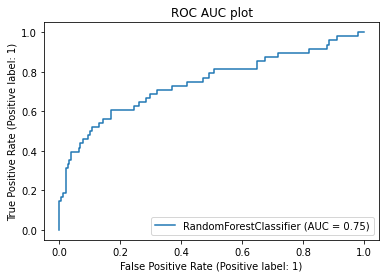

In [55]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show

# WE have seen model is performing 98% well

# model saving

In [56]:
import pickle
filename="HR.pkl"
pickle.dump(lr,open(filename,'wb'))

# Conclusion

In [58]:
loaded_model=pickle.load(open('HR.pkl','rb'))
results=loaded_model.score(x_test,y_test)

In [59]:
results

0.8401360544217688

In [63]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_test[:]],index=['Predicted','Orginal'])
conclusion

0    1    2    3    4    5    6    7    8    9    ...  284  285  \
Predicted    0    0    0    0    0    0    0    0    0    0  ...    0    0   
Orginal      0    0    0    0    0    0    0    0    0    0  ...    0    0   

           286  287  288  289  290  291  292  293  
Predicted    0    0    0    0    0    0    0    0  
Orginal      0    0    0    0    0    0    0    0  

[2 rows x 294 columns]